# Kaggle Digit Recognizer

Code note book for https://www.kaggle.com/competitions/digit-recognizer/overview


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Conv2D
import numpy as np
import pandas as pd
import csv

Explore data

In [ ]:
digits_train = pd.read_csv(
    "train.csv")

x_train = digits_train.copy()
print(x_train.shape)
y_train = x_train.pop('label')
print(x_train.shape)
print(y_train.shape)

x_val, y_val = x_train[-2100:], y_train[-2100:]
x_train, y_train = x_train[:-2100], y_train[:-2100]

x_val = x_val / 255.
x_train = x_train / 255.
print(x_train.shape)
print(x_val.shape)

(42000, 785)
(42000, 784)
(42000,)
(39900, 784)
(2100, 784)


In [ ]:

print(x_train.shape)
print(y_train.shape)



(39900, 784)
(39900,)


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Explore digits in matplot

1
0
1
4
0


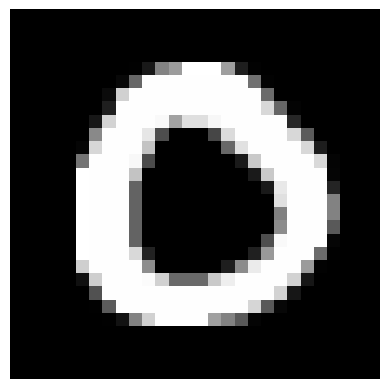

In [ ]:
for i in range(5):
  print(y_train.iloc[i])
  reshape = pd.DataFrame(x_train.iloc[i].values.reshape(28, 28))
  plt.imshow(reshape, cmap='gray')
  plt.axis('off')
plt.show()

Build NN

In [ ]:

model = Sequential([
tf.keras.layers.Input(shape=[784]),
Dense(1000, activation="relu"),
Dense(1000, activation="relu"),
Dense(10, activation="softmax")])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              785000    
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_8 (Dense)             (None, 10)                10010     
                                                                 
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1247/1247 [==============================] - 36s 29ms/step - loss: 0.2044 - accuracy: 0.9365 - val_loss: 0.1507 - val_accuracy: 0.9581
Epoch 2/30
1247/1247 [==============================] - 33s 27ms/step - loss: 0.0916 - accuracy: 0.9727 - val_loss: 0.1138 - val_accuracy: 0.9662
Epoch 3/30
1247/1247 [==============================] - 33s 27ms/step - loss: 0.0606 - accuracy: 0.9807 - val_loss: 0.1262 - val_accuracy: 0.9686
Epoch 4/30
1247/1247 [==============================] - 33s 26ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.1250 - val_accuracy: 0.9700
Epoch 5/30
1247/1247 [==============================] - 33s 27ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.1151 - val_accuracy: 0.9729
Epoch 6/30
1247/1247 [==============================] - 33s 26ms/step - loss: 0.0314 - accuracy: 0.9911 - val_loss: 0.1767 - val_accuracy: 0.9671
Epoch 7/30
1247/1247 [==============================] - 33s 27ms/step - loss: 0.0309 - accuracy: 0.9912 - val_loss: 0.1730 -

Predictions for test data

In [ ]:
x_test = pd.read_csv("test.csv")

print(x_test.shape)

y_test = model.predict(x_test)

y_pred = y_test.argmax(axis=-1)



(28000, 784)
875/875 [==============================] - 6s 7ms/step


In [ ]:
y_pred[:10]
y_test[:10]

array([[0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.99999994, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99999994, 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

Store to CSV

In [ ]:
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId','Label'])
    for i in range(y_pred.size):
        writer.writerow([i + 1, y_pred[i]])